## Лабораторная работа №2. Вычислительная математика. Манджиев Улюмджи. Б01-204
Представлено решение нелинейного уравнения(НУ) и системы НУ методами ПИ и Ньютона.
## Нелинейное уравнение
\begin{equation}
    ln(x) + (x-1)^3 = 0
\end{equation}
## Система нелинейных уравнений
\begin{cases}
    x^2y^2-3x^3+6x^3+8=0 \\
    x^4-9y+2=0
\end{cases}

## Решение нелинейного уравнения

### МПИ

In [1253]:
import numpy as np

def g_func (x):
    return np.power(np.e, -(x-1)**3)

def fixed_point_iteration (f, x_0, n_iters):

    for k in range(0, n_iters):
        x_0 = f(x_0)

    return x_0

### Метод Ньютона

In [1255]:
def func (x):
    return np.log(x)+(x-1)**3

def d_func (x):
    return (1/x)+(3*(x-1)**2)

def newtons_method (f, d_f, x_0, n_iters):

    for k in range(0, n_iters):
        x_0 = x_0 - f (x_0) / d_f (x_0)

    return x_0

## Нахождение корней

Fixed-point iteration:
- x_0 = 22 ==> x = 1.0

Newton's method:
- x_0 = 22 ==> x = 1.0


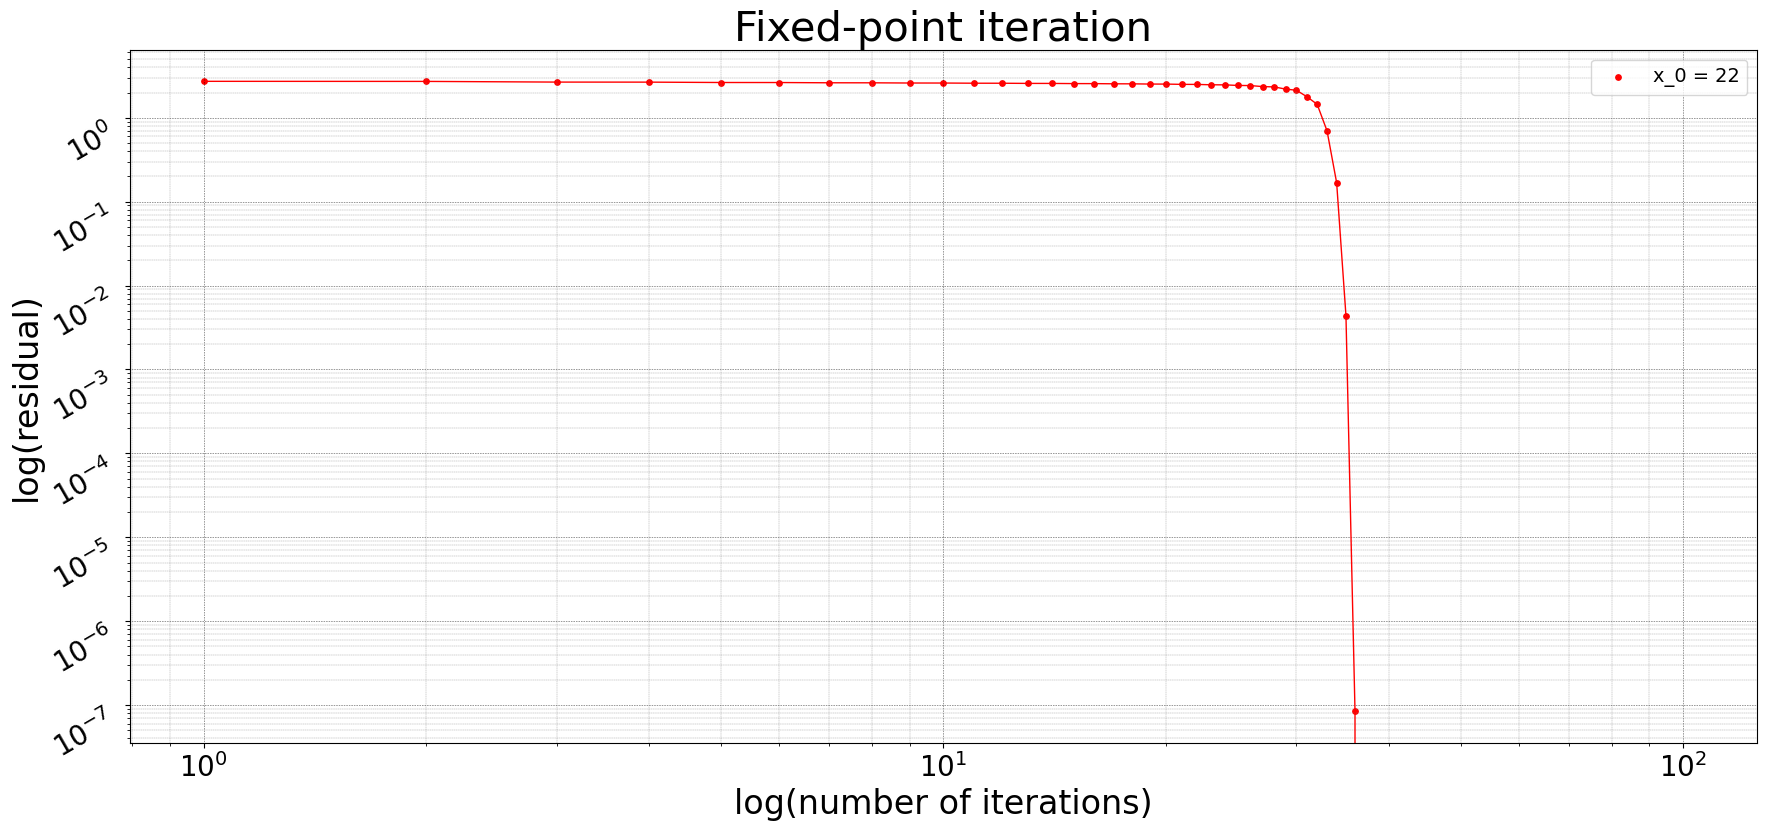

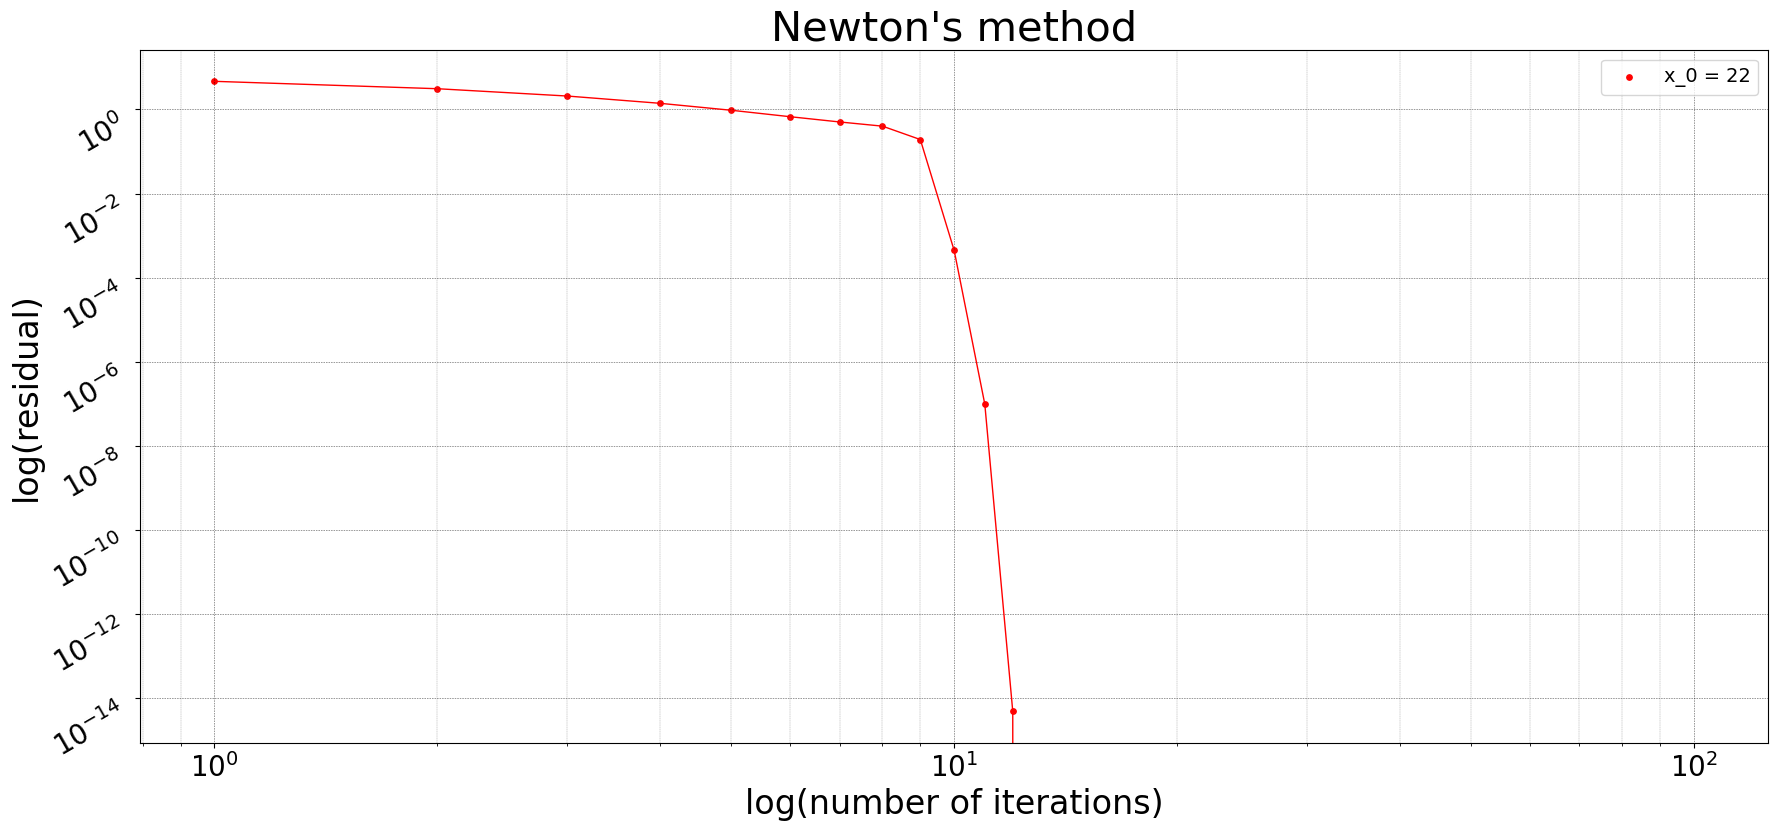

In [1257]:
from matplotlib import pyplot as plt

class Iter_Method:
    def __init__(self, f, x_0, color):
        self.func_ = f
        self.start_ = x_0
        self.color_ = color

class Newtons_Method:
    def __init__(self, f, df, x_0, color):
        self.func_ = f
        self.derivative_ = df
        self.start_ = x_0
        self.color_ = color

def equation_residual_for_iteration (f, x_0, n_iters):
    res = fixed_point_iteration(f, x_0, n_iters)
    return abs (fixed_point_iteration(f, res, 1) - res)

def equation_residual_for_newton (f, df, x_0, n_iters):
    res = newtons_method(f, df, x_0, n_iters)
    return abs (newtons_method(f, df, res, 1) - res)

def dump_fixed_point_iteration (n_iters):

    roots = [Iter_Method(g_func, 22, "red")]
    iters = np.arange(1, n_iters + 1)
    for root in roots:
        residuals = []
        for i in iters:
            residuals.append(equation_residual_for_iteration(root.func_, root.start_, i))

        plt.scatter (iters, residuals, s = 15, color = root.color_, label=f"x_0 = {root.start_}")
        plt.plot (iters, residuals, color=root.color_, linewidth = 1)

def dump_newtons_method (n_iters):

    roots = [Newtons_Method(func, d_func, 22, "red")]
    iters = np.arange(1, n_iters + 1)
    for root in roots:
        residuals = []
        for i in iters:
            residuals.append(equation_residual_for_newton(root.func_, root.derivative_, root.start_, i))

        plt.scatter (iters, residuals, s = 15, color = root.color_, label=f"x_0 = {root.start_}")
        plt.plot (iters, residuals, color=root.color_, linewidth = 1)

def show_results(method_name, dump_func, n_iters):

    plt.figure (figsize = (21, 9), dpi = 100)
    plt.title(method_name, fontsize=30)

    plt.xscale("log")
    plt.yscale("log")

    plt.xlabel("log(number of iterations)", fontsize = 24)
    plt.xticks (fontsize = 20, ha = "center", va = "top")

    plt.ylabel("log(residual)", fontsize = 24)
    plt.yticks (fontsize = 20, rotation = 30, ha = "right", va = "top")

    dump_func(n_iters)

    plt.legend (loc = "best", fontsize = 14)

    plt.grid (color = "black", linewidth = 0.45, linestyle = "dotted")
    plt.minorticks_on()
    plt.grid (which = "minor", color = "grey", linewidth = 0.25, linestyle = "dashed")

    plt.show()


print ("Fixed-point iteration:")
print (f"- x_0 = 22 ==> x = {fixed_point_iteration(g_func, 22, 100)}")

print ("\nNewton's method:")
print (f"- x_0 = 22 ==> x = {newtons_method(func, d_func, 22, 100)}")


show_results("Fixed-point iteration", dump_fixed_point_iteration, 100)
show_results("Newton's method", dump_newtons_method, 100)

## Решение системы нелинейных уравнений

\begin{cases}
    x^2y^2-3x^3+6y^3+1=0 \\
    x^4-9y+2=0
\end{cases}

## МПИ

In [1261]:
def new_x (x, y):
    return np.power(9*y-2,1/4)

def new_y (x, y):
    return np.power((3*x**3-1)/(x**2+6*y),1/2)

def fixed_point_iteration_for_system(f, g, x_0, y_0, n_iters):
    x = x_0
    y = y_0
    for k in range (0, n_iters):
        x = f(x, y)
        y = g(x, y)

    return np.array([x, y]) 

## Метод Ньютона

In [1263]:
## Тут считаю производные:

def a_11 (x, y):
    return 2*x*(y**2)-9*x**2

def a_12 (x, y):
    return 2*(x**2)*y+18*y**2

def a_21 (x):
    return 4*(x**3)

def a_22 (y):
    return -9

def f_1 (x, y):
    return (x**2)*(y**2)-3*x**3+6*y**3+1

def f_2 (x, y):
    return x**4-9*y+2

def jacobi_matrix (X):
    return np.array([[a_11(X[0], X[1]), a_12(X[0], X[1])], [a_21(X[0]), a_22(X[1])]]) 

def newtons_method_for_system(x_0, y_0, n_iters):

    X = np.array([x_0, y_0])

    for k in range(0, n_iters):
        F = np.array([f_1(X[0], X[1]), f_2(X[0], X[1])])
        X = X - np.linalg.inv(jacobi_matrix(X)) @ F

    return X

## Нахождение корней

Fixed-point iteration:
- (x_0, y_0) = (2, 1.2) ==> (x, y) = (1.7163649995810601, 1.1864865252626289)
- (x_0, y_0) = (1, 0.5) ==> (x, y) = (1.7163649995810601, 1.186486525262629)
Newton's method:
- (x_0, y_0) = (2, 1.2) ==> (x, y) = (1.7163649995810601, 1.1864865252626289)
- (x_0, y_0) = (1, 0.5) ==> (x, y) = (0.7221386454466431, 0.25243842167734015)


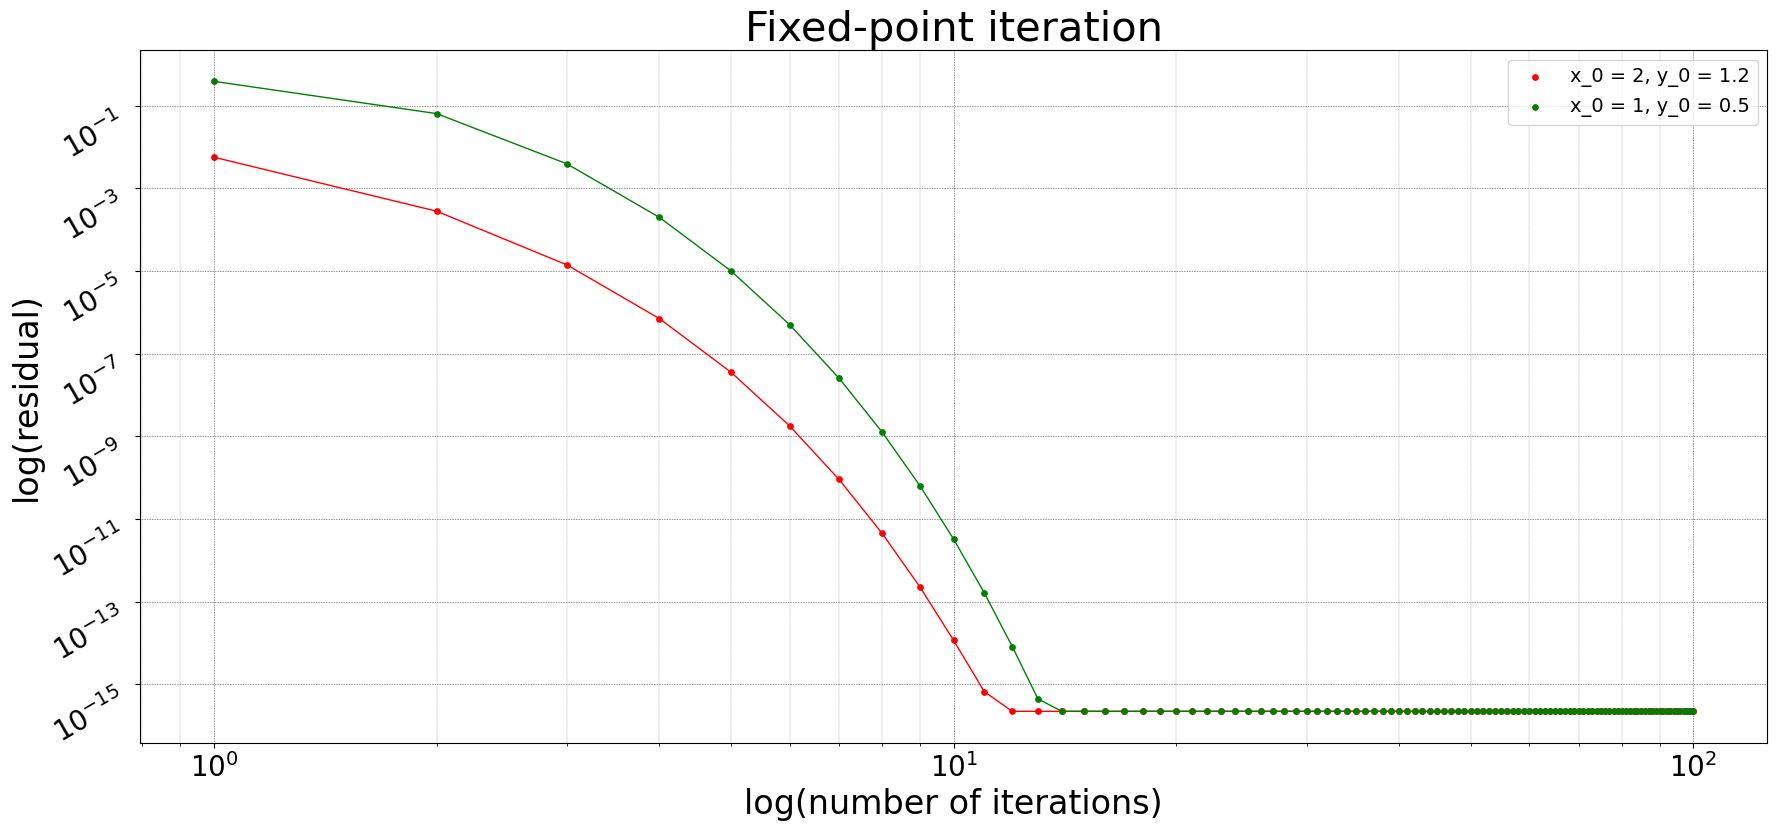

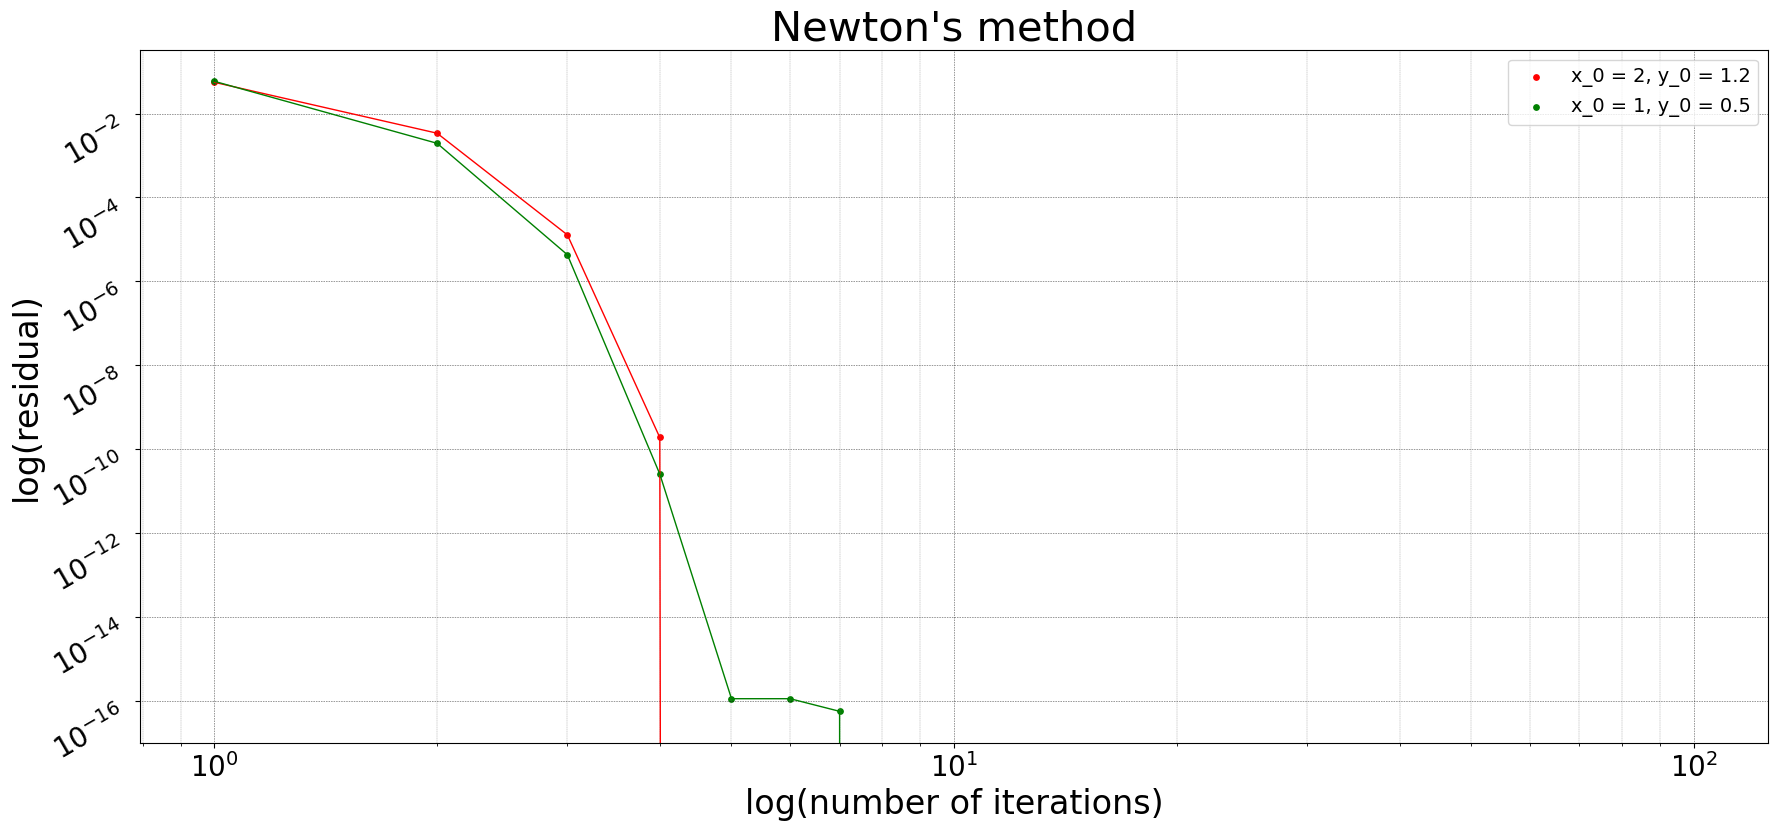

In [1265]:
def norm_1 (obj):
    return np.linalg.norm(obj, ord = np.inf)

class Iter_Method_For_System:
    def __init__(self, f, g, x_0, y_0, color):
        self.f_ = f
        self.g_ = g
        self.x_0_ = x_0
        self.y_0_ = y_0
        self.color_ = color

class Newtons_Method_For_System:
    def __init__(self, x_0, y_0, color):
        self.x_0_ = x_0
        self.y_0_ = y_0
        self.color_ = color

def system_residual_for_iteration (f, g, x_0, y_0, n_iters):
    res = fixed_point_iteration_for_system (f, g, x_0, y_0, n_iters)
    return norm_1 (fixed_point_iteration_for_system(f, g, res[0], res[1], 1) - res)

def system_residual_for_newton (x_0, y_0, n_iters):
    res = newtons_method_for_system(x_0, y_0, n_iters)
    return norm_1 (newtons_method_for_system(res[0], res[1], 1) - res)

def dump_fixed_point_iteration_for_system (n_iters):

    roots = [Iter_Method_For_System(new_x, new_y, 2, 1.2, "red"),
             Iter_Method_For_System(new_x, new_y, 1, 0.5, "green")]
    iters = np.arange(1, n_iters + 1)
    for root in roots:
        residuals = []
        for i in iters:
            residuals.append(system_residual_for_iteration(root.f_, root.g_, root.x_0_, root.y_0_, i))

        plt.scatter (iters, residuals, s = 15, color = root.color_, label=f"x_0 = {root.x_0_}, y_0 = {root.y_0_}")
        plt.plot (iters, residuals, color=root.color_, linewidth = 1)

def dump_newtons_method_for_system (n_iters):

    roots = [Newtons_Method_For_System(2, 1.2, "red"),
             Newtons_Method_For_System(1, 0.5, "green")]
    iters = np.arange(1, n_iters + 1)
    for root in roots:
        residuals = []
        for i in iters:
            residuals.append(system_residual_for_newton(root.x_0_, root.y_0_, i))

        plt.scatter (iters, residuals, s = 15, color = root.color_, label=f"x_0 = {root.x_0_}, y_0 = {root.y_0_}")
        plt.plot (iters, residuals, color=root.color_, linewidth = 1)

def show_results(method_name, dump_func, n_iters):

    plt.figure (figsize = (21, 9), dpi = 100)
    plt.title(method_name, fontsize=30)

    plt.xscale("log")
    plt.yscale("log")

    plt.xlabel("log(number of iterations)", fontsize = 24)
    plt.xticks (fontsize = 20, ha = "center", va = "top")

    plt.ylabel("log(residual)", fontsize = 24)
    plt.yticks (fontsize = 20, rotation = 30, ha = "right", va = "top")

    dump_func(n_iters)

    plt.legend (loc = "best", fontsize = 14)

    plt.grid (color = "black", linewidth = 0.45, linestyle = "dotted")
    plt.minorticks_on()
    plt.grid (which = "minor", color = "grey", linewidth = 0.25, linestyle = "dashed")

    plt.show()

print ("Fixed-point iteration:")
X = fixed_point_iteration_for_system(new_x, new_y, 2, 1.2, 100)
print (f"- (x_0, y_0) = (2, 1.2) ==> (x, y) = {X[0], X[1]}")
X = fixed_point_iteration_for_system(new_x, new_y, 1, 0.5, 100)
print (f"- (x_0, y_0) = (1, 0.5) ==> (x, y) = {X[0], X[1]}")

print ("Newton's method:")
X = newtons_method_for_system(2, 1.2, 100)
print (f"- (x_0, y_0) = (2, 1.2) ==> (x, y) = {X[0], X[1]}")
X = newtons_method_for_system(1, 0.5, 100)
print (f"- (x_0, y_0) = (1, 0.5) ==> (x, y) = {X[0], X[1]}")

show_results("Fixed-point iteration", dump_fixed_point_iteration_for_system, 100)
show_results("Newton's method", dump_newtons_method_for_system, 100)

МПИ сошелся к одному корню

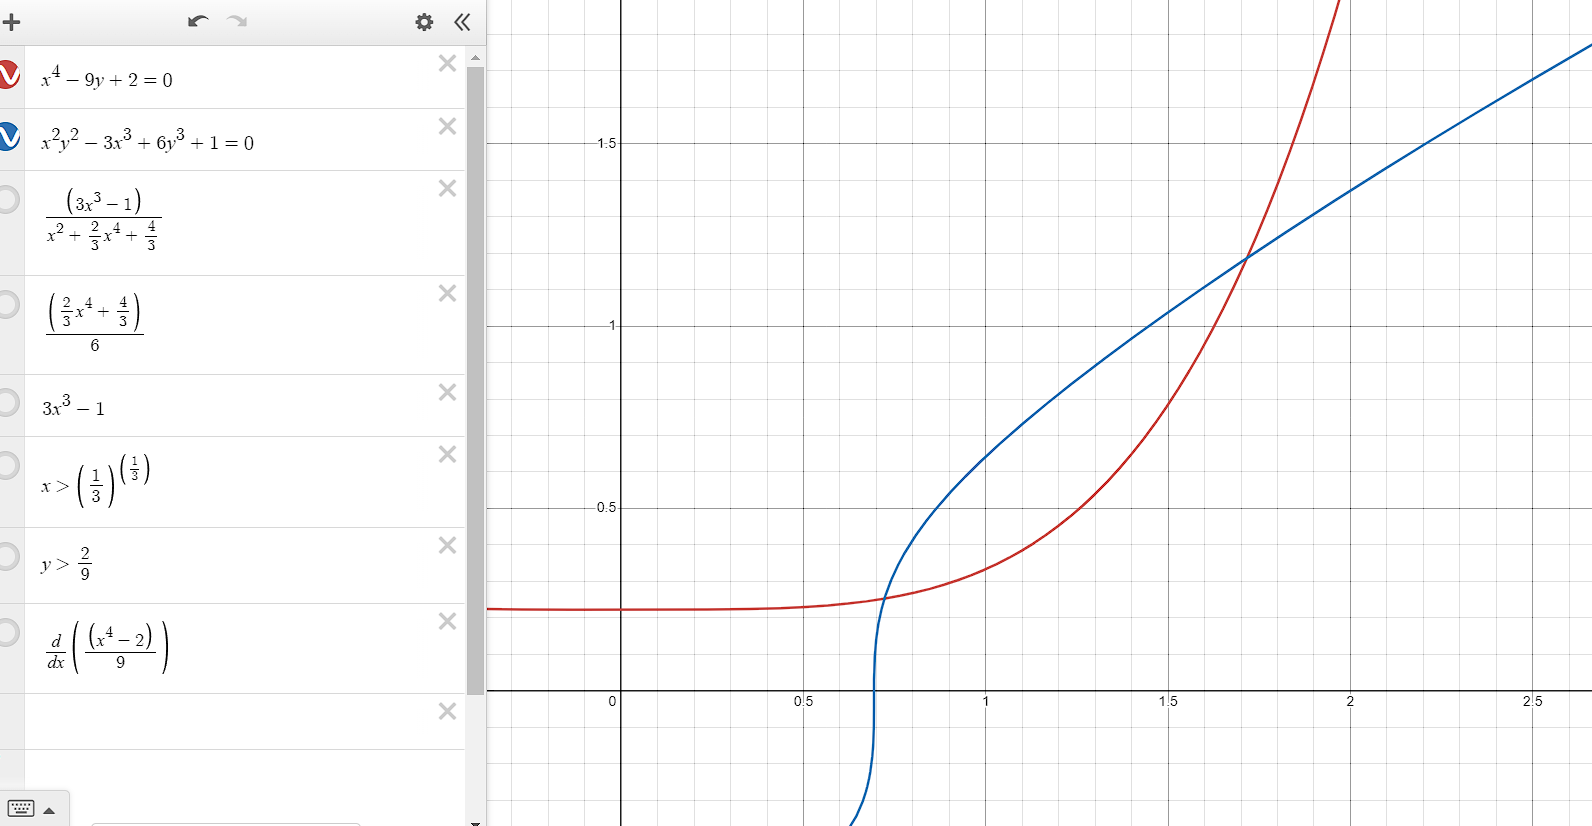